# Supervised Machine Learning - Regression

This notebook serves as a guideline for the general pipeline of Regression Supervised Learning.

# General Pipeline

We start off with the Raw and Labeled data.

### 1. Simple Exploratory Data Analysis 

We do an initial EDA in order to look at the data set, its statistics, amount of categorical versus quantitative columns within the data set and visualise some relationships and identify the **Target** variable and the **Features** within the data set.

### 2. Feature Engineering

#### a. One-Hot Encoding 

This is done on categorical variables to ensure our model can read them quantitatively by transforming each column into a series of columns matching the unique values in the column and converting each value into its dummy variable form.

#### b. Target Transformation

In order to ensure the target variable is normally distributed we can apply a variety of different transformations to the data including **Log-Transformation** and **Box Cox**.

#### c. Feature Scaling

Involves adjusting a variable's scale allowing comparison of variables with different scales.

#### d. Polynomial Regression and Interaction Effects 

Adding polynomial terms or transformation allows us to express non-linear relationships bewteen features.

#### e. Log-Transformation for Skewed Features

### 3. Train-Test Split

### 4. Cross-Validation and Chaining Pipeline

### 5. Hyperparameter Tuning and GridSearchCV

Ridge and Lasso Regressions

### 6. Interprability of Regressions

# General Linear Regression

We can generalize the formula for a linear regression in the following way:

$$ y = \alpha + \sum_{i=0}^N \beta_i x_i + \sum_{j=0}^M \gamma_j D_j  $$

Where, 

$y$ is the target variable or label

$x_i$ represents quantitative variables

$D_j$ represents categorical dummy variables

$N$ is the number of quantitative variables

$M$ is the number of categorical variables

$\beta_i, \gamma_j$ are the model hyperparameters

$\alpha$ is the intercept

## Minimizing the Error Function

### Residual Sum of Squares (RSS)

The residual sum of squares (RSS), also known as the sum of squared residuals (SSR) or the sum of squared estimate of errors (SSE), is the sum of the squares of residuals (deviations predicted from actual empirical values of data). It is a measure of the discrepancy between the data and an estimation model, such as a linear regression. A small RSS indicates a tight fit of the model to the data.

$$ \sum_{i=1}^{n} \Big(y_i - \alpha - \sum_{j-1}^{p} \beta_j x_{ij}\Big)^2 $$

### Sum of Squared Errors (SSE)

is the unexplained variation from our model (what were we unable to explain)

$$ \sum_{i=1}^{n} \Big(y_{\beta}(x^i) - y^i_{\text{obs}}\Big)^2 $$

### Total Sum of Squares (TSS)

measures the distance between the truth and the average values of the truth. This represents the total variation instead

$$ \sum_{i=1}^{n} \Big(\bar{y_{\text{obs}}} - y^i_{\text{obs}}\Big)^2 $$

### Coefficient of Determination (R-Squared)

is a measure of the explained variation by our model, i.e. how much was our model able to reduce the amount of unexplained variance?

$$ R^2 = 1 - \frac{SSE}{TSS} $$

### Mean Squared Error

The goal of linear regression is to minimize the error function. Since we are interested more in a positive error than a negative one we can take the:

- **Absolute value (L1)** or take the 


- **Norm Euclidean distance (L2 Norm)** which will give use the length of each one of our lines between the actual outcome and the line that we predicted (i.e. getting the magnitude of these lines by actual distance):

We use the **L2 Norm** on the error function which we now call the **Mean Squared Error** given it is the squared error for each one of the values divided by the number of values.

$$ \min_{\alpha, \beta_1} \frac{1}{n} \sum_{i=1}^{n} \Big(\Big(\alpha + \beta_1 x^i_{\text{obs}}\Big) - y^i_{\text{obs}}\Big)^2$$

$$\text{or}$$

$$ J(\alpha, \beta_1) =  \frac{1}{2n} \sum_{i=1}^{n} \Big(\Big(\alpha + \beta_1 x^i_{\text{obs}}\Big) - y^i_{\text{obs}}\Big)^2$$

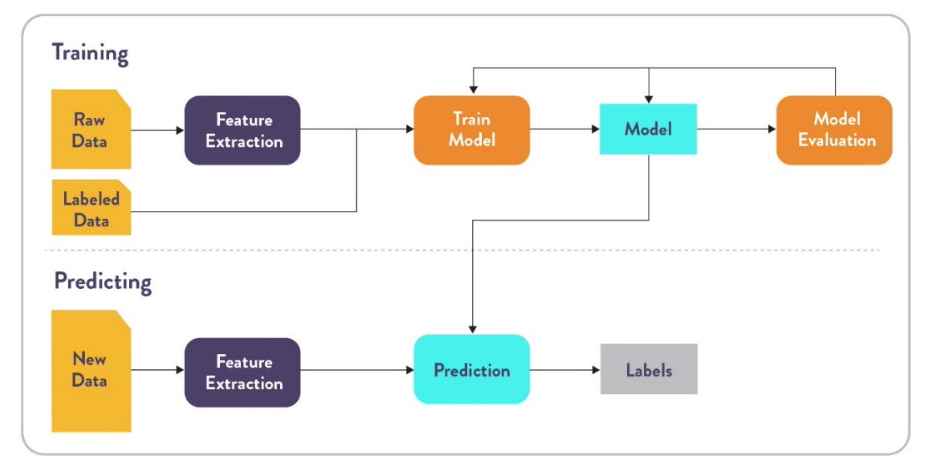

# 1. Exploratory Data Analysis

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the data using the file path

data = pd.read_csv('Ames_Housing_Sales.csv')
df = data.copy()

### Shape of the Data

We start by looking at the number of **columns and rows**:

In [128]:
print("Number of rows in the data:", data.shape[0])
print("Number of columns in the data:", data.shape[1])

Number of rows in the data: 1379
Number of columns in the data: 80


In [129]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


### Data Types for Each Column

Then we examine the value type each column has:

- There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals).

**1. Quantitative Columns:** contain `int64` and `float64`


**2. Categorical Columns:** contain `object` and are in need of One Hot Encoding or Dummy Variable transformation


`value_counts()` returns the number of **unique** values within that column

In [130]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

### Summary Statistics

We can use the `describe()` method to extract the:

- Count


- Mean


- Standard Deviation


- Min and Max


- 25%, 50% and 75% Percentile


for each of our columns

In [131]:
data.iloc[:, :5].describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr
count,1379.000000,1379.000000,1379.000000,1379.000000
mean,1177.129804,353.424946,3.609862,2.865120
std,387.014961,439.553171,30.154682,0.783961
min,438.000000,0.000000,0.000000,0.000000
25%,894.000000,0.000000,0.000000,2.000000
50%,1098.000000,0.000000,0.000000,3.000000
75%,1414.000000,738.500000,0.000000,3.000000
max,4692.000000,2065.000000,508.000000,6.000000


### Grouping the Data and Looking at Different Summary Statistics

One thing we can do with summary statistics is group our data by a certain feature and apply different summary statistics on our data for better cross-column comparison

In [132]:
data[['YrSold', 'BedroomAbvGr', 'OverallQual', 'SalePrice']].groupby('YrSold').mean()

,BedroomAbvGr,OverallQual,SalePrice
YrSold,,,
2006,2.866221,6.197324,186832.876254
2007,2.945513,6.221154,189773.003205
2008,2.846975,6.202847,183593.398577
2009,2.798762,6.170279,183293.656347
2010,2.871951,6.109756,182380.750000


### Visualing relationship between the Variables

We can use a paiplot to have an entire overview of the distribution and correlation of each variable within the data se, or in this case we will look as a smaller set of the actual data in order to have a more readable outcome.

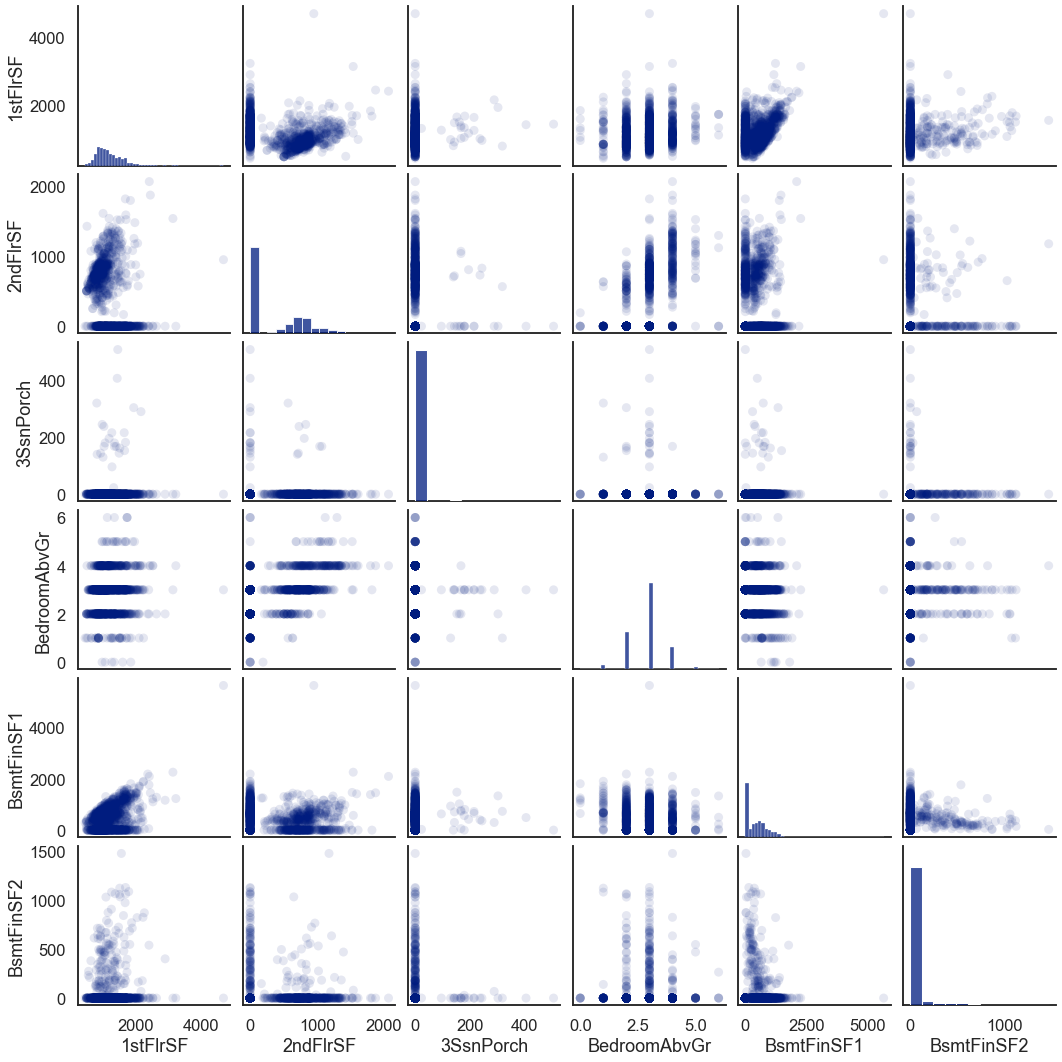

In [133]:
sns.pairplot(data.iloc[:, :10], plot_kws=dict(alpha=0.1, edgecolor="none"))
plt.show()

# 2. Feature Engineering

Our goal here is to *engineer* all the features that require some sort of transformation in order to be fed in our model. We will start with One Hot Encoding:

We will chose as **Target Variable:** `SalePrice`

## a. Encoding

**Definition:** converting non-numeric features to numeric features, such as categorical or ordinal features.

Is often applied to **categorical features** that take non-numeric values of two main types:

- **Nominal:** categorical variables that take values in **unordered** categories (e.g. Red, Blue, Yellow; True, False; Yes, No)


- **Ordinal:** categorical variables that take values in **ordered categories** (e.g High, Medium, Low)

#### Approaches to Encoding Variables:

- **1. Binary Encoding:** converts variables to either 0 or 1 and is suitable for variables that take **two possible values** (e.g. True, False; Male, Female; Married, Not Married)


- **2. One-hot Encoding:** converts variables that take multiple values into multiple columns of (0,1) binary variables, one for each category. This creates several new variables and loses ordering within the category if such order already exists.

e.g. column variables (Red, Blue, Green) => Column Red (True, False), Column Blue (True, False), Column Green (True, False)


- **3. Ordinal Encoding:** involves converting ordered categories to numerical values, usually by creating one variable that takes integres equal to the number of categories (e.g. 0,1,2, ..; like for low, medium high). 

    - **Trade-off between Ordering and Separation of Categories:** We would need to take into account whether **ordering** or **separation of categories** is more important, as now we are setting a **distance** between (e.g. low - medium and medium - high) that might actually not exist.

## One-Hot Encoding

A significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly. 

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. 

**N.B.** The total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [134]:
# Select the object (string) columns from out data.dtypes
mask = data.dtypes == object
categorical_cols = data.columns[mask]

In [135]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

small_num_ohc_cols.sum()

215

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding


* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.


* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn's `LabelEncoder` or `DictVectorizer` can be used. 

However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway.

In [136]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [137]:
# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)

In [138]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0


## Using Pandas Get Dummies

In [139]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

# Here we see another way of one-hot-encoding:
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    df[col] = pd.Categorical(df[col])

# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)

In [140]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,0,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,0,0,1,1,0


## b. Target Transformation

### Determining Normality

Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Visually
* Using a statistical test

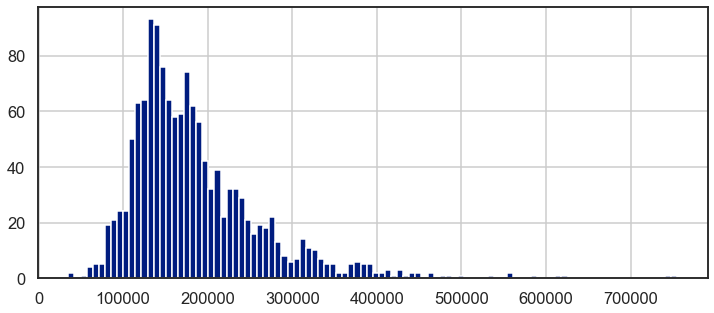

In [141]:
plt.figure(figsize=(12,5))
data.SalePrice.hist(bins=100)
plt.show()

##### D'Agostino K^2 Test

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [142]:
from scipy.stats.mstats import normaltest

if normaltest(data.SalePrice.values)[1] > 0.05: 
    print("Normally Distributed\n\n", normaltest(data.SalePrice.values))
else:
    print("Not Normally Distributed\n\n", normaltest(data.SalePrice.values))

Not Normally Distributed

 NormaltestResult(statistic=594.3267259061613, pvalue=8.781955774010152e-130)


Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable.

### b.1. Log-Transformation

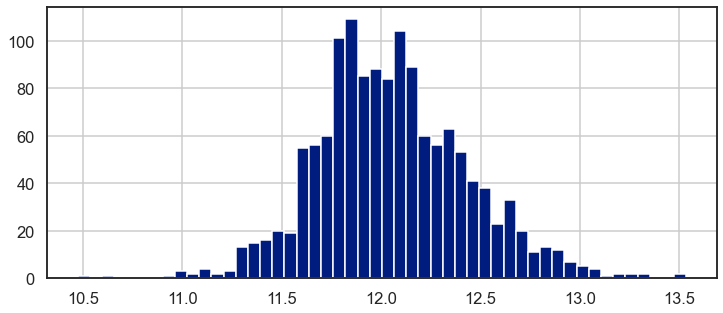

In [143]:
plt.figure(figsize=(12,5))
log_target = np.log(data.SalePrice)
log_target.hist(bins=50);
plt.show()

In [144]:
if normaltest(log_target.values)[1] > 0.05: 
    print("Normally Distributed\n\n", normaltest(log_target.values))
else:
    print("Not Normally Distributed\n\n", normaltest(log_target.values))

Not Normally Distributed

 NormaltestResult(statistic=34.99459487049111, pvalue=2.517794471815587e-08)


### b.2. Square Root Transformation

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

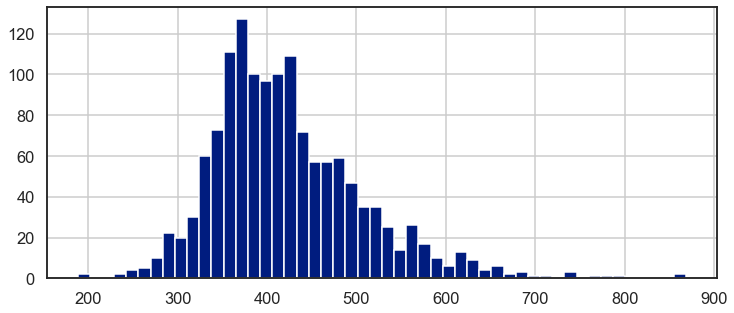

In [145]:
plt.figure(figsize=(12,5))
sqrt_target = np.sqrt(data.SalePrice)
sqrt_target.hist(bins=50);
plt.show()

In [146]:
if normaltest(sqrt_target.values)[1] > 0.05: 
    print("Normally Distributed\n\n", normaltest(sqrt_target.values))
else:
    print("Not Normally Distributed\n\n", normaltest(sqrt_target.values))

Not Normally Distributed

 NormaltestResult(statistic=246.06359528715524, pvalue=3.698019396563468e-54)


### b.3 Box Cox Transformation

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [147]:
from scipy.stats import boxcox
bc_result = boxcox(data.SalePrice)
boxcox_target = bc_result[0]
_lamda = bc_result[1]

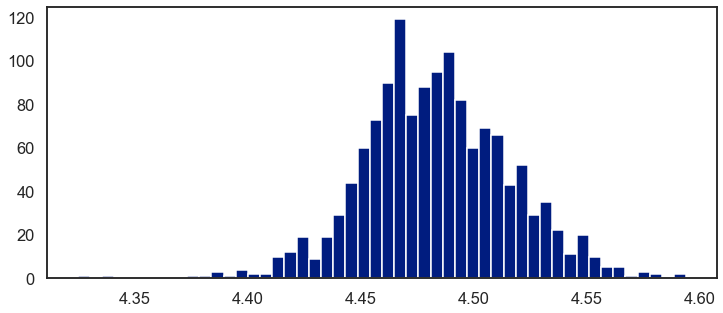

In [148]:
plt.figure(figsize=(12,5))
plt.hist(boxcox_target, bins=50);
plt.show()

In [149]:
if normaltest(boxcox_target)[1] > 0.05: 
    print("Normally Distributed\n\n", normaltest(boxcox_target))
else:
    print("Not Normally Distributed\n\n", normaltest(boxcox_target))

Not Normally Distributed

 NormaltestResult(statistic=20.60421626101897, pvalue=3.356226691547964e-05)


## c. Feature Scaling

Involves adjusting a variable's scale allowing comparison of variables with different scales. Different continuous (numeric) features will often have different scales.

### Standard Scaling:

Converts features to **standard normal variables** (by subtracting the mean and dividing by the standard error). Can be affected by outliers where the mean can be dragged out by an outlier as well as the standard deviation being expanded by an outlier.

### Min-Max Scaling:

Converts variables to continuous variables in the (0,1) interval by mapping **minimim** values to 0 and **maximum** values to 1. This type of scaling is sensitive to outliers.

### Robust Scaling:

is similar to min-max scaling but instead maps the **interquartile range** ($75^{th}$ percentile minus the $25^{th}$ percentile) to (0,1). This means the variable itself takes values outside of the (0,1) interval.

**N.B.** these are part of the sklearn preprocessing module - `from sklearn.preprocessing import (StandardScaler, MinMaxScaler, RobustScaler)`

Scaling is important for Regularization and to understand the Importance of each feature. For interpretability purposes scaling would be less intuitive however.

**What is the most "impactful" feature** (this is intended to be slightly ambiguous)? "In what direction" does it affect "y"?

In [196]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

y_s_col = "SalePrice"

X_s = data.drop(y_s_col, axis=1)
y_s = data[y_s_col]

In [197]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_ss = s.fit_transform(X_s)

lr2 = LinearRegression()
lr2.fit(X_ss, y_s)
print(lr2.coef_) # coefficients now "on the same scale"

[ 8.22475977e+03  9.47777966e+03  6.38368369e+02 -7.85043884e+03
  4.29145284e+03 -2.36402438e+00  4.17161323e+03  4.00988724e+02
 -7.69763633e+02  6.46714347e+02  2.31272674e+03  1.25023715e+03
  1.29028298e+03  1.00469386e+04 -1.60479008e+03  1.41698304e+04
 -1.43115714e+03 -4.22287803e+03  4.97911351e+03 -3.04478354e+03
  1.75424017e+02 -7.86500172e+03  5.06365148e+03 -2.82296962e+02
 -1.56247132e+02 -4.84876907e+01  5.93269579e+03  2.46567187e+04
 -1.25695818e+03  3.04456713e+03  8.54424646e+03  3.73724438e+03
  3.16593133e+03  1.08908605e+04  2.04171472e+03 -9.03637191e+02]


Based on these results,

We can "zip up" the names of the features of a DataFrame `df` with a model `model` fitted on that DataFrame using:

```python
dict(zip(df.columns.values, model.coef_))
```

In [199]:
pd.DataFrame(zip(X.columns, lr2.coef_)).sort_values(by=1).head()

,0,1
21,MSSubClass,-7865.001723
3,BedroomAbvGr,-7850.438839
17,KitchenAbvGr,-4222.878028
19,LotFrontage,-3044.783542
14,GarageYrBlt,-1604.790080


## d. Polynomial Regression and Interaction Effects 

Polynomial terms capture higher order feature of data. The resulting outcome will still be a **Linear Regression**.

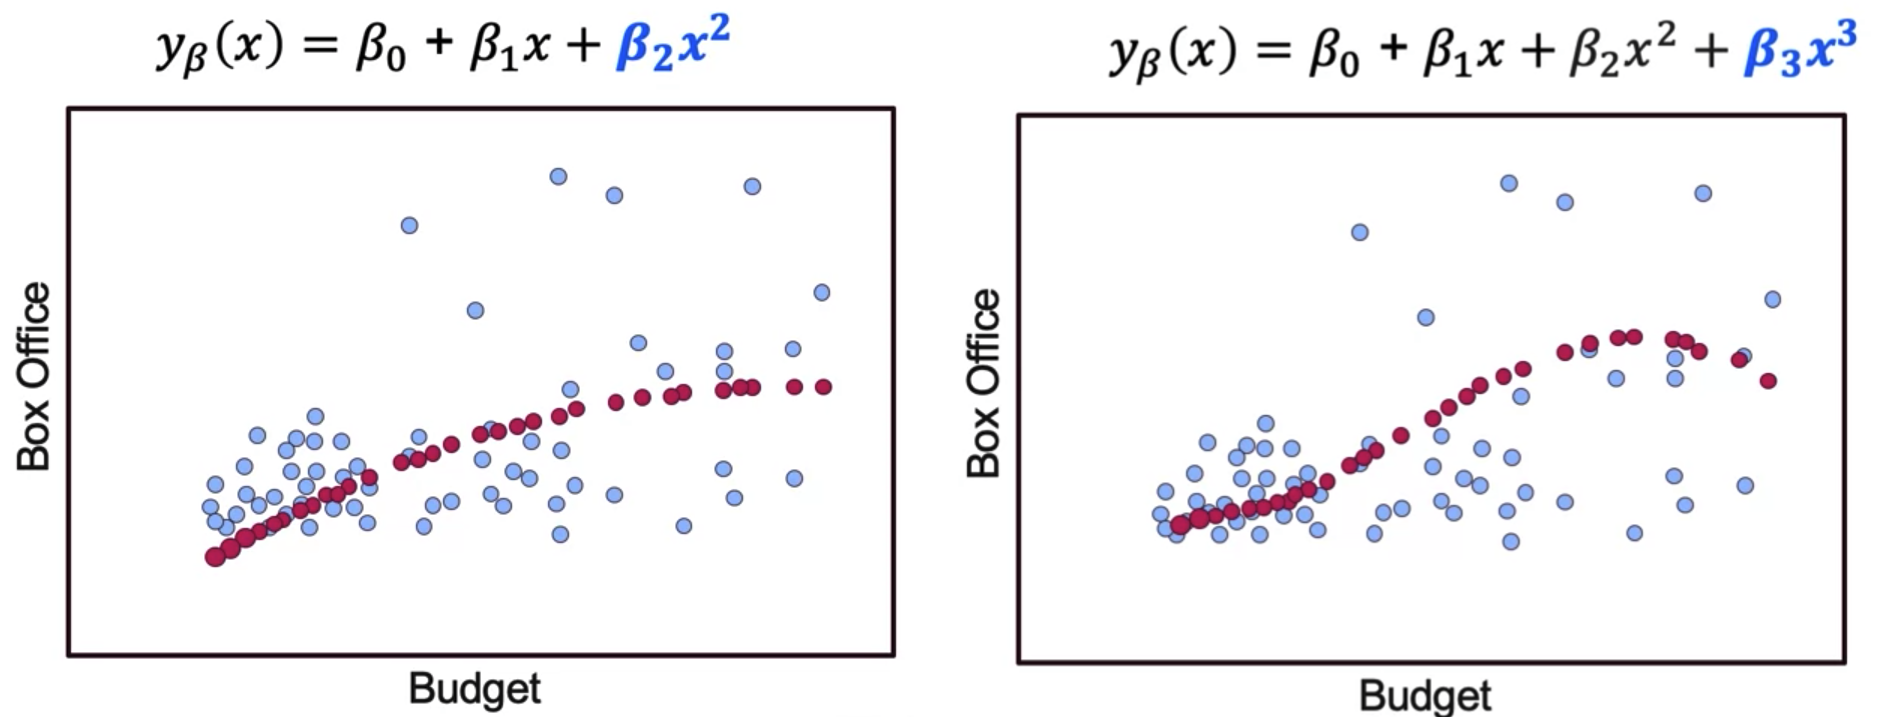

### Variable Interaction

$$y_{\beta} = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2$$

We fit the data according to our polynomial regression and then we transform in order to get all the variable interactions between our features.

```python

from sklearn.preprocessing import PolynomialFeatures

polyFeat = PolynomialFeatures(degree=2)
polyFeat = polyFeat.fit(X_data)
X_ploy = polyFeat.transform(X_data)

```

#### Example with Sin(x) as the Real Function

In [150]:
sin_data = pd.read_csv('X_Y_Sinusoid_Data.csv')

X_sin_real = np.linspace(0, 1.0, 100)
Y_sin_real = np.sin(2 * np.pi * X_sin_real)

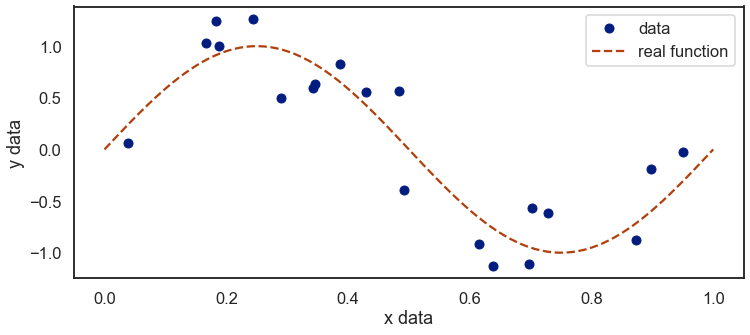

In [151]:
plt.figure(figsize=(12,5))

sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot of the noisy (sparse)
ax = sin_data.set_index('x')['y'].plot(ls='', marker='o', label='data')
ax.plot(X_sin_real, Y_sin_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');

### Overfitting with Polynomial Features


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

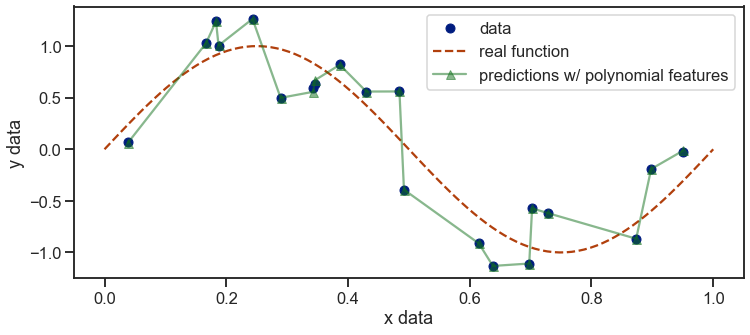

In [192]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_sin_data = sin_data[['x']] # we need to pass in the dataframe version of it
Y_sin_data = sin_data['y']

# Create the features and fit the model
X_sin_poly = pf.fit_transform(X_sin_data)
lr = lr.fit(X_sin_poly, Y_sin_data)
Y_sin_pred = lr.predict(X_sin_poly)

plt.figure(figsize=(12,5))

# Plot the result
plt.plot(X_sin_data, Y_sin_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_sin_real, Y_sin_real, ls='--', label='real function')
plt.plot(X_sin_data, Y_sin_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');


## e. Log-Transformation for Skewed Features

In [153]:
# Create a list of float colums to check for skewing
mask = df.dtypes == float
float_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

In [154]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols.head()

,Skew
MiscVal,24.841008
PoolArea,14.406273
LotArea,12.013038
LowQualFinSF,10.712587
3SsnPorch,10.007116


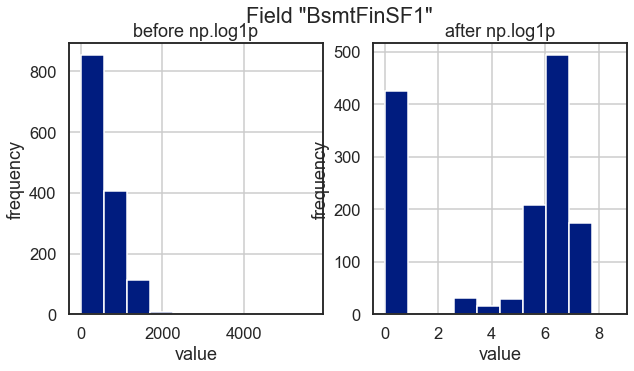

In [155]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "BsmtFinSF1"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [156]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [157]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,6.753438,6.751101,0.0,3,6.561031,0.0,1,0,5.017280,0.000000,...,0,0,0,0,0,0,0,1,1,0
1,7.141245,0.000000,0.0,3,6.886532,0.0,0,1,5.652489,0.000000,...,0,0,0,0,0,0,0,1,1,0
2,6.825460,6.765039,0.0,3,6.188264,0.0,1,0,6.075346,0.000000,...,0,0,0,0,0,0,0,1,1,0
3,6.869014,6.629363,0.0,3,5.379897,0.0,1,0,6.293419,5.609472,...,0,0,0,0,0,0,0,1,1,0
4,7.044033,6.960348,0.0,4,6.486161,0.0,1,0,6.196444,0.000000,...,0,0,0,0,0,0,0,1,1,0


# 3. Train-Test Split

Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a train/validation split before we fit and score the model.

- **Training:** 70% of the data will be used for Training 


- **Testing:** 30% of the data will be used for Testing

### Comparing One-Hot-Encoding with no Encoding 

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
from sklearn.model_selection import train_test_split
y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one-hot enc
train,1.131507e+09,3.177266e+08
test,1.372182e+09,4.777314e+20


Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. This is because the one-hot encoded model is overfitting the data.

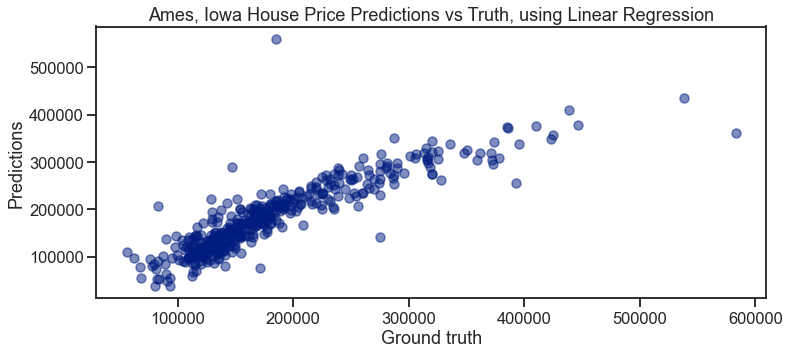

In [161]:
plt.figure(figsize=(12,5))

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');

plt.show()

# 4. Cross-Validation and Chaining Pipeline

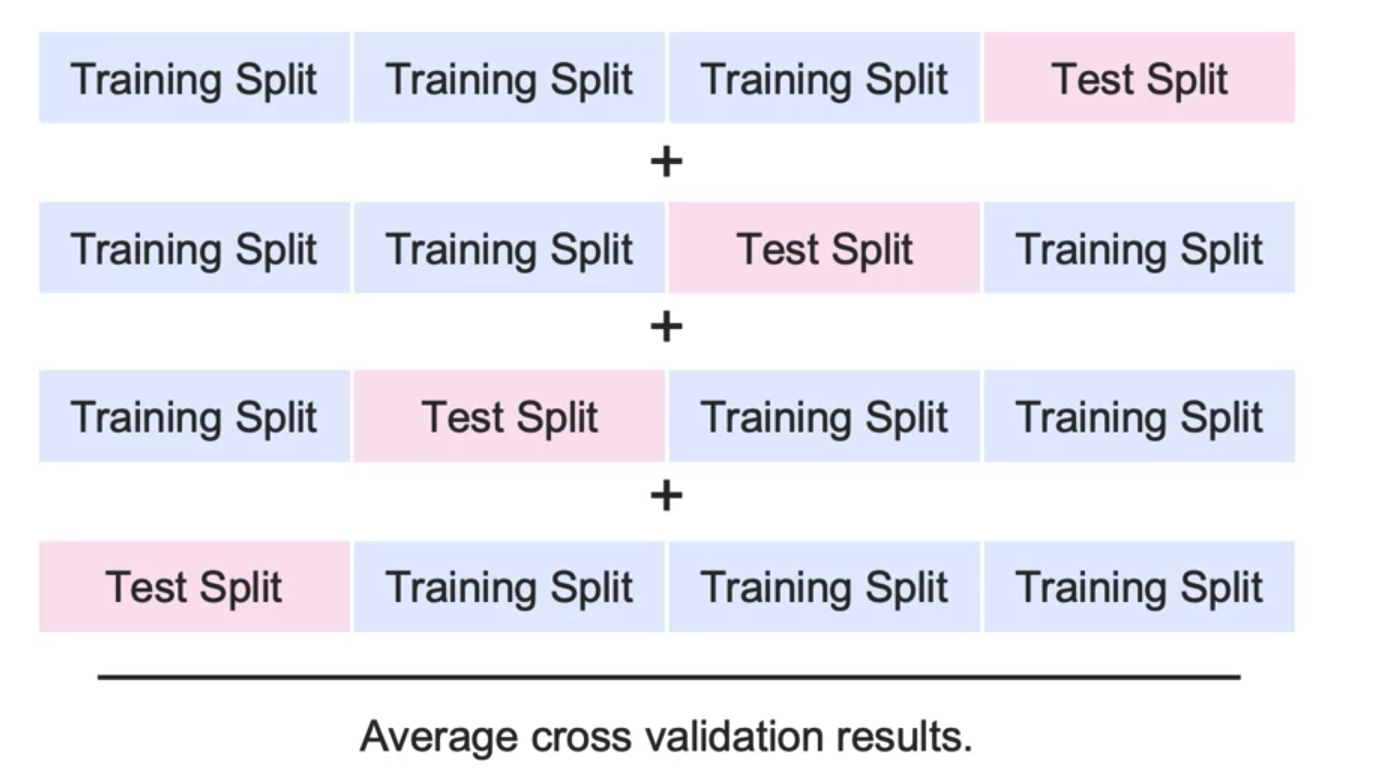

Cross validation is about splitting the data into two parts, the same way the train-test split was done, but we will be doing this k-times meaning splitting into multiple pairs of training-test splits and averaging the resulting errors across pairs.

## Error vs. Complexity Tradeoff

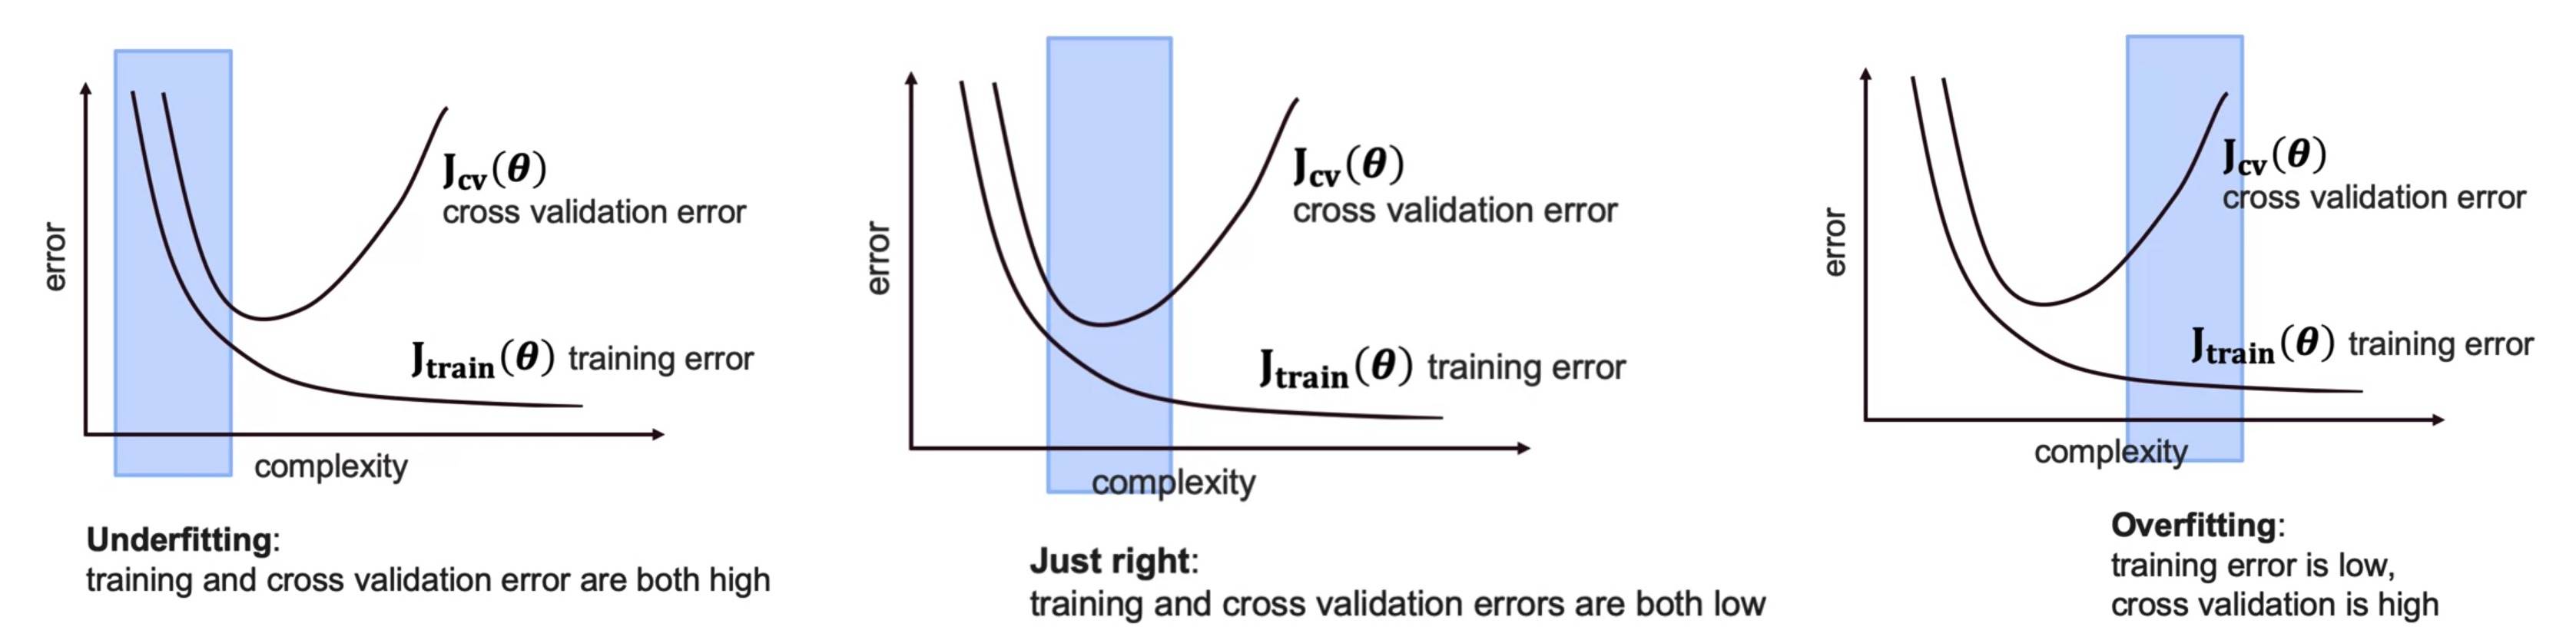

Therefore, cross-validation can make us aware of overfitting or underfitting

## Bias vs. Variance Tradeoff

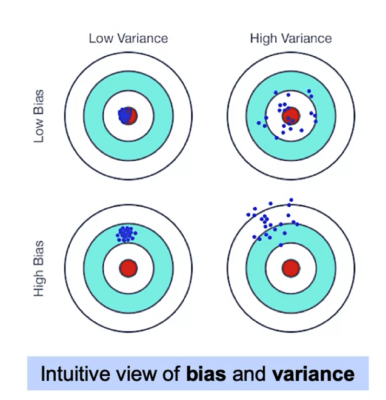

- **Bias:** is a tendency to miss


- **Variance:** is a tendency to be inconsistent


- **Tendency:** is the expectation of the out-of-sample behaviour over many training set samples


### High Bias - Low Variance

**Tendency** of predictions to miss the true values


- Worsened by missing information or by overly-simplistic assumptions


- Missed real patterns (underfitting)


### Low Bias - High Variance

**Tendency** of predictions to fluctuate


- Characterized by sensitivity of the output to small changed in input data


- Often due to overly complex or poorly fitted models

### Visualizing the Complexity Tradeoff

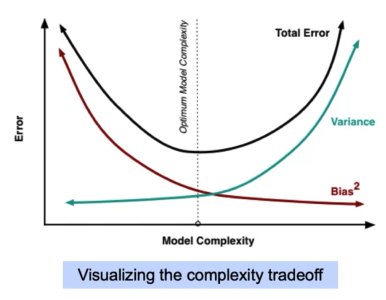

In [162]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

We will use the `KFold` object in SciKit learn to tell the cross-validation how to split up the data

In [163]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

We can visually see the data split as:

In [164]:
X = data.drop('SalePrice', axis=1)
y = data.SalePrice

In [165]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index), 100*round(len(train_index)/(len(train_index) + len(test_index)),2),"%")
    print("Test index:",test_index[:10], len(test_index), 100*round(len(test_index)/(len(train_index) + len(test_index)),2),"%")
    print('')

Train index: [ 0  2  4  5  6  7  8 10 11 12] 919 67.0 %
Test index: [ 1  3  9 16 17 24 26 27 30 33] 460 33.0 %

Train index: [ 1  3  8  9 10 11 13 14 16 17] 919 67.0 %
Test index: [ 0  2  4  5  6  7 12 15 20 23] 460 33.0 %

Train index: [ 0  1  2  3  4  5  6  7  9 12] 920 67.0 %
Test index: [ 8 10 11 13 14 18 19 21 22 28] 459 33.0 %



### `Pipeline` and `cross_val_predict`

`Pipeline` lets you chain together multiple operators on your data that both have a `fit` method.

In [166]:
s = StandardScaler()
lr = LinearRegression()

### Combine multiple processing steps into a `Pipeline`

A pipeline contains a series of steps, where a step is ("name of step", actual_model). The "name of step" string is only used to help you identify which step you are on, and to allow you to specify parameters at that step.  

In [167]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

### `cross_val_predict`

[`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) is a function that does K-fold cross validation for us, appropriately fitting and transforming at every step of the way.

In [168]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [169]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [170]:
r2_score(y, predictions)

0.7831309631117962

**N.B.** `cross_val_predict` doesn't use the same model for all steps; the predictions for each row are made when that row is in the validation set. We really have the collected results of 3 (i.e. `kf.num_splits`) different models. 

When we are done, `estimator` is still not fitted. If we want to predict on _new_ data, we still have to train our `estimator`. 

# 5. Hyperparameter tuning & Grid Search CV

### Definition

**Hyperparameter tuning** involves using cross validation (or train-test split) to determine which hyperparameters are most likely to generate a model that _generalizes_ well outside of your sample.

### Mechanics

We can generate an exponentially spaces range of values using the numpy [`geomspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html#numpy.geomspace) function.

```python
np.geomspace(1, 1000, num=4)
```

produces:

```
array([    1.,    10.,   100.,  1000.])
```

Use this function to generate a list of length 10 called `alphas` for hyperparameter tuning:

In [171]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

Get Train-Test Split of the data:

In [176]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test  = test[feature_cols]
y_test  = test['SalePrice']

Then we tune the `alpha` hyperparameter for Lasso or Ridge regressions.

## a. Ridge Regression 

The cost function of the Ridge regression is:

$$ \sum_{i=1}^{n} \Big(y_i - \alpha - \sum_{j-1}^{p} \beta_j x_{ij}\Big)^2  + \lambda \sum_{j-1}^{p} \beta_j^2 = \text{RSS} + \lambda \sum_{j-1}^{p} \beta_j^2$$

**N.B.** $\lambda$ is the same as $\alpha$ in `SciKit Learn`

Where we are adding on a penalty, the $\lambda$ coefficent that is a function of our coefficients.

We are now trying to **reduce error** while also ensuring that our model is **not too complex**, i.e. everytime we increase our model by a coefficient, it will impact our cost function that we are ultimately tring to minimize.

### Scaling

- **Linear Regression:** would not have a large effect on our eventual outcome


- **Ridge Regression:** if scaling is not taken into consideration, and a feature has a drastically higher scale than another, adding on this feature will impact our cost function. Therefore, we want to **first make sure** that all of our different features are on the same scale

Standard Scaling can be done as follows:

$$ x^{'} = \frac{x - \bar{x}}{\sigma} $$

### Ridge Regression Penalty

The complexity penalty $\lambda$ is applied proportionally to the squared coefficient values, i.e. as we are increasing/decreasing $\lambda$ we are increasing/decreasing the effect of the square of each of the coefficient values.

- The penalty term has the effect of *shrinking* coefficients toward 0 (the higher the coefficient is, the more the penalty there is) - We want to **reduce** the size of these coefficients


- This imposes bias on our model **but** also reduces variance


- We can select the best regularization strength $\lambda$ via cross-validation (increasing and decreasing the penalty terms and see how well it performs in our test sets)


- It is best practise to scale the features (using StandardScaler) so penalties are not impacted by variable scale

$$ J(\alpha, \beta_1) = \frac{1}{2n}\sum_{i=1}^{n} \Big((\alpha + \beta_1 x_{\text{obs}}^i \Big)- y_{\text{obs}}^i \Big)^2  + \lambda \sum_{j-1}^{p} \beta_j^2 $$

The penalty shrinks the magnitude of all coefficients


Larger coefficients are strongly penalized because of **squaring** - larger weights are penalized even more proportionally to the lower weight coefficients


**Complexity Tradeoff:** variance reduction may outpace the increase in bias leading to a better model fit.


**Shrinkage Effect** increases as regularization strength increases

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.


In [177]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# root-mean-squared error function
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print("The best alpha is: {} with Root Mean Square Error: {}".format(
                                        ridgeCV.alpha_, ridgeCV_rmse))

The best alpha is: 10.0 with Root Mean Square Error: 32040.433237817062


## b. LASSO Regression

LASSO = Least Absolute Shrinkage and Selector Operator

The difference between LASSO and Ridge is how we penalize the cost function using our coefficients:

**Ridge- L2:**

We use the coefficient squared or L2 to penalize the cost function:

$$||\beta||_2 = \sqrt{\sum_{j=1}^p\beta_j^2}$$

**LASSO - L1**

We use the absolute value to penalize the cost function:

$$||\beta||_1 = \sum|\beta_j|$$

**N.B.** penalties are closely related to L1/L2 norms that measure vector length

$$ J(\alpha, \beta_1) = \frac{1}{2n}\sum_{i=1}^{n} \Big((\alpha + \beta_1 x_{\text{obs}}^i \Big)- y_{\text{obs}}^i \Big)^2  + \lambda \sum_{j-1}^{k} |{\beta_j}| $$

In LASSO regression, the complexity penality $\lambda$ is directly proportional to the absolute value of the coefficients.

- Similar to Ridge: the effect of the complexity tradeoff means increasing lambda raises the bias but lowers the variance


- LASSO is more likely than Ridge to perform **Feature Selection** in that for a fixed $\lambda$, LASSO is more likely to result in coefficients being set to zero (therefore selecting the features for us)


- Penalization not as strong


- Slower to converge than Ridge 


- Penalty selectivly shrinks some coefficients


- Shrinkage and selection effect increases as regularization strength increases thereofre some features drop to zero

Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [178]:
from sklearn.linear_model import LassoCV
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

# Lasso is slower
print("The best alpha is: {} with Root Mean Square Error: {}".format(
                                        lassoCV.alpha_, lassoCV_rmse))

The best alpha is: 0.0005 with Root Mean Square Error: 89886.7232979347


We can determine how many of these features remain non-zero.

In [179]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 251 coefficients, 241 are non-zero with Lasso.


## c. Elastic Net (Hybrid Approach)

Arises from the question, how to choose between different models:

$$ \lambda \sum_{j=1}^{p} \Big( \alpha \beta_j^2 + \Big( 1 - \alpha \Big) |\beta_j| \Big) $$

Validation can give us an empirical method for selecting between models.

- If goal is **interpretability** LASSO's feature selection property yields an interpretability bonus but mau underperform of the target truly depends on many of these features being dropped


- If the goal is the be computationally more efficient - **timing** - the the Ridge regression will outperform the LASSO regression

### Hybrid Approach

The Elastic Net is an alternative that introduces a new parameter $\alpha$ that determines a weighted average of L1 and L2 penalties. The idea is can we get the best of both worlds?

This new approach combines penalties from both **Ridge** and **LASSO** regression. It requires tuning of an additional parameter that determines the emphasis of L1 vs. L2 regularization penalties:

$$ J(\alpha, \beta_1) = \frac{1}{2n}\sum_{i=1}^{n} \Big((\alpha + \beta_1 x_{\text{obs}}^i \Big)- y_{\text{obs}}^i \Big)^2  + \lambda_1 \sum_{j-1}^{k} |{\beta_j}| + \lambda_2 \sum_{j-1}^{k} \beta_j^2 $$

In [180]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.1 36220.49757618272


### Comparisng All Models

Comparing the RMSE calculation from all models is easiest in a table.

In [181]:
## Linear Regression
linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))


rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,78601.293386
Ridge,32040.433238
Lasso,89886.723298
ElasticNet,36220.497576


We can also make a plot of actual vs predicted housing prices as before.

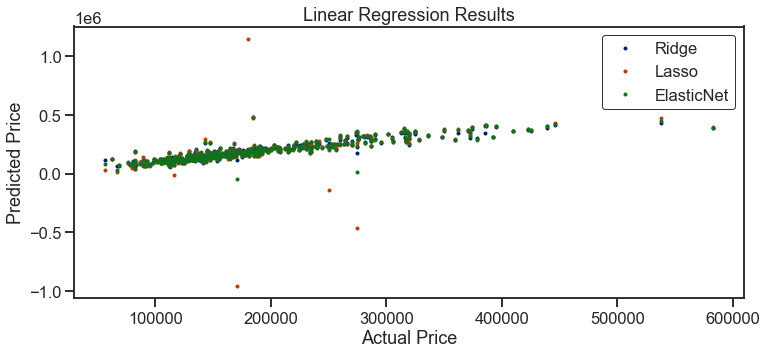

In [182]:
f = plt.figure(figsize=(12,5))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

## Grid Search CV

To do cross-validation, we used two techniques:
- use `KFolds` and manually create a loop to do cross-validation
- use `cross_val_predict` and `score` to get a cross-valiated score in a couple of lines.

To do hyper-parameter tuning, we see a general pattern:
- use `cross_val_predict` and `score` in a manually written loop over hyperparemeters, then select the best one.

Perhaps not surprisingly, there is a function that does this for us -- `GridSearchCV`

In [183]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [184]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [185]:
grid.best_score_, grid.best_params_

(0.7862833452665464,
 {'polynomial_features__degree': 1, 'ridge_regression__alpha': 20.0})

In [186]:
y_predict = grid.predict(X)

In [187]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

0.8107931037255625

In [188]:
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00,  8.00133575e+03,  9.08901651e+03,  6.39370918e+02,
       -7.47354079e+03,  4.42163830e+03,  2.20089374e+01,  4.13093630e+03,
        3.79013776e+02, -6.40791984e+02,  5.93585983e+02,  2.55493603e+03,
        1.67867282e+03,  1.66963928e+03,  9.67471456e+03, -1.15767923e+03,
        1.36711616e+04, -1.03704329e+03, -4.29953211e+03,  4.85726603e+03,
       -2.84917806e+03,  1.37331185e+02, -7.57033425e+03,  5.15314474e+03,
       -2.72632956e+02, -1.15232420e+02,  8.79472309e+00,  5.67989765e+03,
        2.40917060e+04, -1.20344159e+03,  2.99643299e+03,  8.47295114e+03,
        4.01469599e+03,  3.16960923e+03,  9.98879221e+03,  2.43476883e+03,
       -8.96222142e+02])

## Regularization with Ridge and LASSO on the Sin(X) Example

Increase Bias, reduce the Variance and bring down complexity of model in order to have a better fit.

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
* Plot the results
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude. 

What does the comparatively large magnitude of the data tell you about the role of regularization?

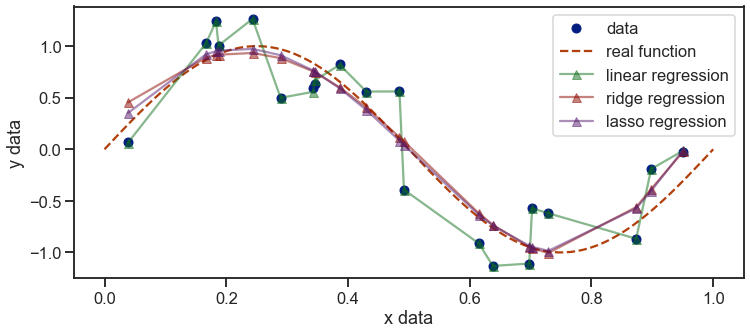

In [190]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_sin_poly, Y_sin_data)
Y_sin_pred_rr = rr.predict(X_sin_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_sin_poly, Y_sin_data)
Y_sin_pred_lr = lassor.predict(X_sin_poly)

plt.figure(figsize=(12,5))

# The plot of the predicted values
plt.plot(X_sin_data, Y_sin_data, marker='o', ls='', label='data')
plt.plot(X_sin_real, Y_sin_real, ls='--', label='real function')
# no regularization
plt.plot(X_sin_data, Y_sin_pred, label='linear regression', marker='^', alpha=.5)
# with regularization
plt.plot(X_sin_data, Y_sin_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_sin_data, Y_sin_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [193]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
# take absolute value of all 
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.783911e+13,2.169397,2.167284
std,6.038244e+13,2.900278,4.706731
min,1.622914e+07,0.000000,0.000000
25%,3.421984e+12,0.467578,0.000000
50%,3.623240e+13,1.017272,0.252181
75%,1.071032e+14,2.883507,1.641353
max,1.655707e+14,12.429635,20.176708


In [194]:
(coefficients > 0).sum()

linear regression    21
ridge regression     20
lasso regression     15
dtype: int64

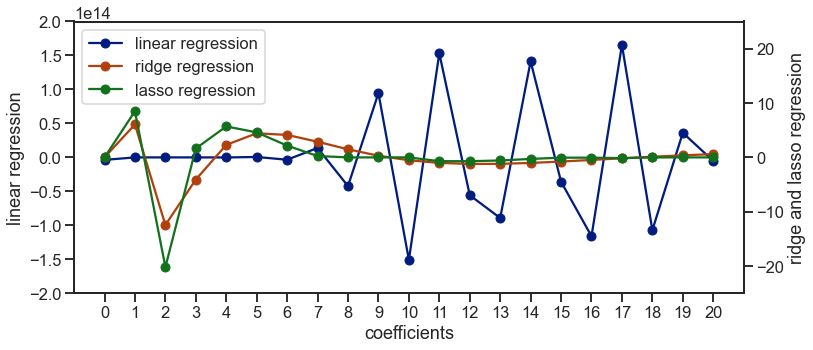

In [195]:
colors = sns.color_palette()

plt.figure(figsize=(12,5))

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx() # same x different y axes

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));